In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# importing libraries

In [1]:
import numpy as np
import pandas as pd
from tqdm import trange, tqdm

from matplotlib import pyplot as plt
import seaborn as sns
color = sns.color_palette()


%matplotlib inline

# importing data

## aisle data

In [2]:
data_aisle = pd.read_csv('./MBA/aisles.csv')
data_aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


## department data

In [3]:
data_departments = pd.read_csv('./MBA/departments.csv')
data_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


## prior order data

In [4]:
data_order_products__prior = pd.read_csv('./MBA/order_products__prior.csv')
data_order_products__prior = data_order_products__prior[:5000000]
data_order_products__prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
4999995,527766,26283,6,1
4999996,527767,30855,1,1
4999997,527767,17840,2,1
4999998,527768,19660,1,1


## train order data

In [5]:
data_order_products__train = pd.read_csv('./MBA/order_products__train.csv')
data_order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


## order data

In [6]:
data_orders = pd.read_csv('./MBA/orders.csv')
data_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## products data

In [8]:
data_products = pd.read_csv('./MBA/products.csv')
data_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Merging data

In [9]:
merged_prior = pd.DataFrame()
merged_prior = data_order_products__prior
merged_prior = pd.merge(merged_prior, data_orders, on = 'order_id', how = 'left')
merged_prior = pd.merge(merged_prior, data_products, on='product_id', how='left')
merged_prior = pd.merge(merged_prior, data_aisle, on='aisle_id', how='left')
merged_prior = pd.merge(merged_prior, data_departments, on='department_id', how='left')
merged_prior.fillna(0, inplace=True)

In [10]:
merged_prior

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,527766,26283,6,1,149394,prior,7,0,16,4.0,White Corn,83,4,fresh vegetables,produce
4999996,527767,30855,1,1,13445,prior,40,3,12,2.0,Chocolate Hazelnut Butter Blend,88,13,spreads,pantry
4999997,527767,17840,2,1,13445,prior,40,3,12,2.0,Naked Coconut Organic Coconut Bliss,119,1,frozen dessert,frozen
4999998,527768,19660,1,1,199618,prior,4,1,9,5.0,Spring Water,115,7,water seltzer sparkling water,beverages


# EDA

In [ ]:
k=merged_prior['order_id'].value_counts()
k_val=k.values
p,q=np.unique(k_val,return_counts=True)

f, ax = plt.subplots(figsize=(15, 12))
plt.xlabel('number of products in an order')
plt.ylabel('number of orders')
plt.xticks(rotation='vertical')
sns.barplot(p,q)

In [ ]:
k=merged_prior['reordered'].value_counts()
f, ax = plt.subplots(figsize=(8, 8))
plt.xlabel('reordered or not reordered')
plt.ylabel('number of products')
sns.barplot(k.index,k.values)
plt.ticklabel_format(style='plain', axis='y')

In [ ]:
k=merged_prior['user_id'].value_counts()
p,q=np.unique(k,return_counts=True)
f,ax = plt.subplots(figsize=(15, 12))

plt.xlabel('number of orders per user')
plt.ylabel('number of users')
plt.xticks(rotation='vertical')
sns.barplot(p,q)
ax.set_xticks(np.arange(0,max(p),50))

In [ ]:
gr=merged_prior.groupby('product_name')['reordered'].aggregate
gr

In [ ]:
del data_order_products__prior

# ARM

In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [198]:
X_prior  = pd.crosstab(merged_prior['user_id'][:70000], merged_prior['product_name'][:70000]).astype('bool').astype('int')

X_prior

product_name,& Go! Hazelnut Spread + Pretzel Sticks,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Fat Superfruits Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",0% Milkfat Greek Plain Yogurt,...,in Gravy with Carrots Peas & Corn Mashed Potatoes & Meatloaf Nuggets,of Hanover 100 Calorie Pretzels Mini,of Norwich Original English Mustard Powder Double Superfine,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum
user_id,,,,,,,,,,,,,,,,,,,,,
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206082,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
# del data_orders
# del data_aisle
# del data_products
# del data_departments

In [214]:
frequent_itemsets=apriori(X_prior, min_support=0.01, use_colnames=True).sort_values('support', ascending=False) 

#These are all the POPULAR (Top 20) items purchased from the store.
frequent_itemsets.reset_index(drop = True)

,support,itemsets
0,0.152316,(Banana)
1,0.120695,(Bag of Organic Bananas)
2,0.083581,(Organic Strawberries)
3,0.071407,(Organic Baby Spinach)
4,0.067102,(Organic Hass Avocado)
...,...,...
118,0.010243,(Organic Sour Cream)
119,0.010243,(Russet Potato)
120,0.010243,(Sharp Cheddar Cheese)
121,0.010243,"(Organic Red Radish, Bunch)"


In [222]:
rules = association_rules(frequent_itemsets,metric='confidence',min_threshold=0.01)
rules = rules.sort_values(by='confidence',ascending=False).reset_index(drop = True)
rules['antecedent support'] = rules['antecedent support'].round(decimals = 6)
rules['consequent support'] = rules['consequent support'].round(decimals = 6)
rules['support'] = rules['support'].round(decimals = 6)
rules['confidence'] = rules['confidence'].round(decimals = 6)
rules.iloc[:,:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence
0,(Honeycrisp Apple),(Banana),0.028949,0.152316,0.012470,0.430769
1,(Organic Fuji Apple),(Banana),0.029097,0.152316,0.010837,0.372449
2,(Organic Raspberries),(Bag of Organic Bananas),0.043498,0.120695,0.014400,0.331058
3,(Strawberries),(Banana),0.046615,0.152316,0.014103,0.302548
4,(Organic Hass Avocado),(Bag of Organic Bananas),0.067102,0.120695,0.019596,0.292035
5,(Organic Avocado),(Banana),0.057898,0.152316,0.016182,0.279487
6,(Organic Whole Milk),(Banana),0.039638,0.152316,0.010837,0.273408
7,(Organic Raspberries),(Organic Strawberries),0.043498,0.083581,0.010837,0.249147
8,(Organic Strawberries),(Banana),0.083581,0.152316,0.020042,0.239787
9,(Organic Baby Spinach),(Banana),0.071407,0.152316,0.016033,0.224532


In [352]:
# del frequent_itemsets
# del rules

# creating features

### feature related to user

In [38]:
user_features = pd.DataFrame(columns=['user_id'])
user_features['user_id'] = merged_prior['user_id'].sort_values().unique()

In [39]:
#each user reordered_ratio =  times reordered / times ordered

user_reorder_rate =  merged_prior.groupby('user_id')['reordered'].aggregate(['mean']).reset_index()
user_reorder_rate.rename(columns = {'mean': 'user_reorder_rate'}, inplace=True)

# merging product reorder ratio to product_features

user_features = user_features.merge(user_reorder_rate, on = "user_id", how = "left")
user_features.user_reorder_rate.fillna(0, inplace=True)
user_features

,user_id,user_reorder_rate
0,1,0.615385
1,3,0.571429
2,4,0.000000
3,5,0.666667
4,6,0.285714
...,...,...
154791,206204,0.200000
154792,206205,0.857143
154793,206206,0.640000
154794,206207,0.666667


In [40]:
del user_reorder_rate

In [41]:
#Get count of all unique products for every user
user_features['user_unique_products'] = merged_prior.groupby(["user_id"])['product_name'].nunique().reset_index(name = 'unique')['unique']
user_features

,user_id,user_reorder_rate,user_unique_products
0,1,0.615385,9
1,3,0.571429,12
2,4,0.000000,2
3,5,0.666667,12
4,6,0.285714,7
...,...,...,...
154791,206204,0.200000,10
154792,206205,0.857143,7
154793,206206,0.640000,16
154794,206207,0.666667,21


In [42]:
#Get count of all products ordered by user
user_features['user_total_products'] = merged_prior.groupby(["user_id"])['product_name'].size().reset_index(name = 'count')['count']
user_features

,user_id,user_reorder_rate,user_unique_products,user_total_products
0,1,0.615385,9,13
1,3,0.571429,12,14
2,4,0.000000,2,2
3,5,0.666667,12,12
4,6,0.285714,7,7
...,...,...,...,...
154791,206204,0.200000,10,10
154792,206205,0.857143,7,7
154793,206206,0.640000,16,25
154794,206207,0.666667,21,21


In [43]:
#Get mean products per user = Average cart size of user
user_features['user_avg_cart_size'] = merged_prior.groupby(["user_id","order_id"])['add_to_cart_order'].count().reset_index(name='cart_size')\
                                                                .groupby('user_id')['cart_size'].mean().reset_index()['cart_size']
user_features                                                                

,user_id,user_reorder_rate,user_unique_products,user_total_products,user_avg_cart_size
0,1,0.615385,9,13,6.500
1,3,0.571429,12,14,7.000
2,4,0.000000,2,2,2.000
3,5,0.666667,12,12,12.000
4,6,0.285714,7,7,7.000
...,...,...,...,...,...
154791,206204,0.200000,10,10,10.000
154792,206205,0.857143,7,7,7.000
154793,206206,0.640000,16,25,3.125
154794,206207,0.666667,21,21,10.500


In [44]:
#Get average days between 2 orders for every user
user_features['user_avg_days_between_orders'] =  merged_prior.groupby(["user_id","order_id"])['days_since_prior_order'].max().reset_index(name='mean_days_between_orders')\
                                                                .groupby('user_id')['mean_days_between_orders'].mean().reset_index()['mean_days_between_orders']
user_features

,user_id,user_reorder_rate,user_unique_products,user_total_products,user_avg_cart_size,user_avg_days_between_orders
0,1,0.615385,9,13,6.500,24.500000
1,3,0.571429,12,14,7.000,10.000000
2,4,0.000000,2,2,2.000,15.000000
3,5,0.666667,12,12,12.000,19.000000
4,6,0.285714,7,7,7.000,6.000000
...,...,...,...,...,...,...
154791,206204,0.200000,10,10,10.000,9.000000
154792,206205,0.857143,7,7,7.000,10.000000
154793,206206,0.640000,16,25,3.125,3.250000
154794,206207,0.666667,21,21,10.500,19.000000


In [45]:
#get user product reorder ratio 
# number of unique products reordered / number of unique products ordered

df = pd.DataFrame()
df['user_id'] = merged_prior['user_id'].sort_values().unique()
df['user_unique_products'] = merged_prior.groupby(["user_id"])['product_name'].nunique().reset_index(name = 'unique')['unique']
df['user_reordered_products'] = merged_prior.groupby(["reordered"]).get_group(1).groupby(["user_id"])['product_name'].nunique().reset_index(name = 'reordered_unique')['reordered_unique']
df.fillna(0, inplace = True)
user_features['user_reordered_products_ratio'] = df['user_reordered_products'] / df['user_unique_products']
user_features


,user_id,user_reorder_rate,user_unique_products,user_total_products,user_avg_cart_size,user_avg_days_between_orders,user_reordered_products_ratio
0,1,0.615385,9,13,6.500,24.500000,0.555556
1,3,0.571429,12,14,7.000,10.000000,0.500000
2,4,0.000000,2,2,2.000,15.000000,4.000000
3,5,0.666667,12,12,12.000,19.000000,0.166667
4,6,0.285714,7,7,7.000,6.000000,4.142857
...,...,...,...,...,...,...,...
154791,206204,0.200000,10,10,10.000,9.000000,0.000000
154792,206205,0.857143,7,7,7.000,10.000000,0.000000
154793,206206,0.640000,16,25,3.125,3.250000,0.000000
154794,206207,0.666667,21,21,10.500,19.000000,0.000000


In [46]:
del df

In [47]:
# feature: how frequently user reordered any product given difference between 2 orders in days ?
df = merged_prior.groupby(['user_id','days_since_prior_order'])["reordered"].size()
df = df/merged_prior.groupby(["user_id"]).size()
df = df.reset_index(name = 'u_days_since_prior_order_reorder_rate')
user_features["u_days_since_prior_order_reorder_rate"] = df["u_days_since_prior_order_reorder_rate"]
user_features

,user_id,user_reorder_rate,user_unique_products,user_total_products,user_avg_cart_size,user_avg_days_between_orders,user_reordered_products_ratio,u_days_since_prior_order_reorder_rate
0,1,0.615385,9,13,6.500,24.500000,0.555556,0.384615
1,3,0.571429,12,14,7.000,10.000000,0.500000,0.615385
2,4,0.000000,2,2,2.000,15.000000,4.000000,0.642857
3,5,0.666667,12,12,12.000,19.000000,0.166667,0.357143
4,6,0.285714,7,7,7.000,6.000000,4.142857,1.000000
...,...,...,...,...,...,...,...,...
154791,206204,0.200000,10,10,10.000,9.000000,0.000000,0.200000
154792,206205,0.857143,7,7,7.000,10.000000,0.000000,0.363636
154793,206206,0.640000,16,25,3.125,3.250000,0.000000,0.254545
154794,206207,0.666667,21,21,10.500,19.000000,0.000000,0.181818


In [48]:
del df

In [49]:
# user_prior_order_counts = pd.DataFrame(merged_prior.groupby("user_id")["order_number"].max())
# user_prior_order_counts.reset_index(inplace=True)
# user_prior_order_counts.sort_values(by ='order_number', ascending=False, inplace = True)
# user_prior_order_counts

In [50]:
# products_per_order = merged_prior.groupby(['user_id', 'order_id'])['product_id'].count().to_frame('total_products_ordered').reset_index()
# products_per_order

In [51]:
# avg_products_per_order = products_per_order.groupby('user_id')['total_products_ordered'].mean().to_frame('avg_products_in_an_order').reset_index()
# avg_products_per_order

In [52]:
# order_number  = total number of orders of the user
# avg_products_in_an_order = avg number of products ordered by that user over those orders

# user_orders = user_prior_order_counts.merge(avg_products_per_order, on= 'user_id', how='left')
# user_orders

In [53]:
# del products_per_order

### features related to product

In [54]:
# creating product features dataframe

product_features = pd.DataFrame(columns=['product_id'])
product_features['product_id'] = data_products['product_id']

In [55]:
#each product reordered_ratio =  times reordered / times ordered

products_count =  merged_prior.groupby('product_id')['reordered'].aggregate(['mean']).reset_index()
products_count.rename(columns = {'mean': 'reordered_ratio'}, inplace=True)
products_count

,product_id,reordered_ratio
0,1,0.600000
1,2,0.071429
2,3,0.740741
3,4,0.500000
4,5,1.000000
...,...,...
46003,49682,0.230769
46004,49683,0.694879
46005,49685,0.250000
46006,49686,0.695652


In [56]:
# merging product reorder ratio to product_features

product_features = product_features.merge(products_count, on = "product_id", how = "left")

product_features.reordered_ratio.fillna(0, inplace=True)

product_features

,product_id,reordered_ratio
0,1,0.600000
1,2,0.071429
2,3,0.740741
3,4,0.500000
4,5,1.000000
...,...,...
49683,49684,0.000000
49684,49685,0.250000
49685,49686,0.695652
49686,49687,0.000000


In [57]:
del products_count

In [58]:
# mean add to cart order position

mean_position = merged_prior.groupby('product_id')['add_to_cart_order'].mean().reset_index(name = 'mean_position')
mean_position.sort_values(by = 'product_id', inplace = True)
mean_position

,product_id,mean_position
0,1,6.068966
1,2,11.000000
2,3,7.740741
3,4,9.608696
4,5,6.000000
...,...,...
46003,49682,8.076923
46004,49683,7.646677
46005,49685,7.125000
46006,49686,6.260870


In [59]:
# merge it to product features dataframe

product_features = product_features.merge(mean_position, on = "product_id", how = "left")

product_features.mean_position.fillna(0, inplace=True)

product_features

,product_id,reordered_ratio,mean_position
0,1,0.600000,6.068966
1,2,0.071429,11.000000
2,3,0.740741,7.740741
3,4,0.500000,9.608696
4,5,1.000000,6.000000
...,...,...,...
49683,49684,0.000000,0.000000
49684,49685,0.250000,7.125000
49685,49686,0.695652,6.260870
49686,49687,0.000000,0.000000


In [60]:
del mean_position

In [61]:
#Get dept reorder rate
df = merged_prior.groupby(['department_id']).size().reset_index(name='order_count')
dept_reorder_rate = merged_prior.groupby(["reordered"]).get_group(1).groupby(['department_id']).size().reset_index(name='reorder_rate')
df['dept_reorder_rate'] = dept_reorder_rate['reorder_rate']/df['order_count']
df.drop(['order_count'], axis = 1, inplace = True)
new_df = pd.merge(data_products, df, on = 'department_id')
new_df = new_df[["product_id", "dept_reorder_rate"]]

In [62]:
product_features = pd.merge(product_features, new_df , on='product_id', how = 'left')
product_features

,product_id,reordered_ratio,mean_position,dept_reorder_rate
0,1,0.600000,6.068966,0.574618
1,2,0.071429,11.000000,0.347910
2,3,0.740741,7.740741,0.652324
3,4,0.500000,9.608696,0.541077
4,5,1.000000,6.000000,0.347910
...,...,...,...,...
49683,49684,0.000000,0.000000,0.576405
49684,49685,0.250000,7.125000,0.541077
49685,49686,0.695652,6.260870,0.629435
49686,49687,0.000000,0.000000,0.599710


In [63]:
del df
del new_df
del dept_reorder_rate

In [64]:
#Get aisle reorder rate
df = merged_prior.groupby(['aisle_id']).size().reset_index(name='order_count')
aisle_reorder_rate = merged_prior.groupby(["reordered"]).get_group(1).groupby(['aisle_id']).size().reset_index(name='reorder_rate')
df['aisle_reorder_rate'] = aisle_reorder_rate['reorder_rate']/df['order_count']
df.drop(['order_count'], axis = 1, inplace = True)
new_df = pd.merge(data_products, df, on = 'aisle_id')
new_df = new_df[["product_id", "aisle_reorder_rate"]]

In [65]:
product_features = pd.merge(product_features, new_df , on='product_id', how = 'left')
product_features

,product_id,reordered_ratio,mean_position,dept_reorder_rate,aisle_reorder_rate
0,1,0.600000,6.068966,0.574618,0.549649
1,2,0.071429,11.000000,0.347910,0.152387
2,3,0.740741,7.740741,0.652324,0.521754
3,4,0.500000,9.608696,0.541077,0.557381
4,5,1.000000,6.000000,0.347910,0.279872
...,...,...,...,...,...
49683,49684,0.000000,0.000000,0.576405,0.575678
49684,49685,0.250000,7.125000,0.541077,0.540740
49685,49686,0.695652,6.260870,0.629435,0.672404
49686,49687,0.000000,0.000000,0.599710,0.621280


In [66]:
del df
del new_df
del aisle_reorder_rate

In [232]:
# feature : how frequently product was reordered on any given hour ?

df = merged_prior.groupby(['product_id','order_hour_of_day'])["reordered"].size()
df = df/merged_prior.groupby(["product_id"]).size()
df = df.reset_index(name = 'hour_reorder_rate')
product_features["hour_reorder_rate"] = df["hour_reorder_rate"]
product_features

product_id  order_hour_of_day
1           0                    0.010345
            1                    0.010345
            2                    0.003448
            4                    0.003448
            5                    0.003448
                                   ...   
49688       15                   0.066667
            16                   0.133333
            18                   0.066667
            19                   0.133333
            20                   0.066667
Length: 438571, dtype: float64

In [68]:
del df

In [69]:
# feature: how frequently product was reordered on any given day ?

df = merged_prior.groupby(['product_id','order_dow'])["reordered"].size()
df = df/merged_prior.groupby(["product_id"]).size()
df = df.reset_index(name = 'day_reorder_rate')
product_features["day_reorder_rate"] = df["day_reorder_rate"]
product_features

,product_id,reordered_ratio,mean_position,dept_reorder_rate,aisle_reorder_rate,hour_reorder_rate,day_reorder_rate
0,1,0.600000,6.068966,0.574618,0.549649,0.010345,0.106897
1,2,0.071429,11.000000,0.347910,0.152387,0.010345,0.227586
2,3,0.740741,7.740741,0.652324,0.521754,0.003448,0.134483
3,4,0.500000,9.608696,0.541077,0.557381,0.003448,0.155172
4,5,1.000000,6.000000,0.347910,0.279872,0.003448,0.175862
...,...,...,...,...,...,...,...
49683,49684,0.000000,0.000000,0.576405,0.575678,0.058824,0.500000
49684,49685,0.250000,7.125000,0.541077,0.540740,0.058824,0.500000
49685,49686,0.695652,6.260870,0.629435,0.672404,0.078431,1.000000
49686,49687,0.000000,0.000000,0.599710,0.621280,0.098039,0.139535


In [70]:
del df

In [71]:
# feature: how frequently a product was reordered  given that difference between 2 orders containing product in days ?

df = merged_prior.groupby(['product_id','days_since_prior_order'])["reordered"].size()
df = df/merged_prior.groupby(["product_id"]).size()
df = df.reset_index(name = 'p_days_since_prior_order_reorder_rate')
product_features["p_days_since_prior_order_reorder_rate"] = df["p_days_since_prior_order_reorder_rate"]
product_features

,product_id,reordered_ratio,mean_position,dept_reorder_rate,aisle_reorder_rate,hour_reorder_rate,day_reorder_rate,p_days_since_prior_order_reorder_rate
0,1,0.600000,6.068966,0.574618,0.549649,0.010345,0.106897,0.103448
1,2,0.071429,11.000000,0.347910,0.152387,0.010345,0.227586,0.051724
2,3,0.740741,7.740741,0.652324,0.521754,0.003448,0.134483,0.051724
3,4,0.500000,9.608696,0.541077,0.557381,0.003448,0.155172,0.048276
4,5,1.000000,6.000000,0.347910,0.279872,0.003448,0.175862,0.041379
...,...,...,...,...,...,...,...,...
49683,49684,0.000000,0.000000,0.576405,0.575678,0.058824,0.500000,0.024823
49684,49685,0.250000,7.125000,0.541077,0.540740,0.058824,0.500000,0.028369
49685,49686,0.695652,6.260870,0.629435,0.672404,0.078431,1.000000,0.056738
49686,49687,0.000000,0.000000,0.599710,0.621280,0.098039,0.139535,0.117021


In [72]:
del df

### features related to user product

In [73]:
user_product_features = pd.DataFrame(columns=['user_id','product_id'])

In [74]:
#get unique user-product pairs ( total data is reduced by 60 %)
#prior_train_orders.groupby(["user_id","product_id"]).size().shape[0]/prior_train_orders.shape[0]  - 0.409
#add user and product to dataframe
u_p = merged_prior.groupby(["user_id","product_id"]).size().reset_index()
user_product_features["user_id"] = u_p["user_id"]
user_product_features["product_id"] = u_p["product_id"]
user_product_features

,user_id,product_id
0,1,196
1,1,10258
2,1,10326
3,1,12427
4,1,13176
...,...,...
3645240,206208,45007
3645241,206208,45264
3645242,206208,47008
3645243,206208,48017


In [75]:
del u_p

In [76]:
#How frequently user ordered the product ?
# #times user ordered the product/ #times user placed an order
df = merged_prior.groupby(["user_id","product_id"])["reordered"].size()
df = df/merged_prior.groupby(["user_id"]).size()
df = df.reset_index(name = 'order_rate')
df.fillna(0. , inplace = True)
user_product_features["u_p_order_rate"] = df["order_rate"]
user_product_features

,user_id,product_id,u_p_order_rate
0,1,196,0.153846
1,1,10258,0.153846
2,1,10326,0.076923
3,1,12427,0.153846
4,1,13176,0.076923
...,...,...,...
3645240,206208,45007,0.012821
3645241,206208,45264,0.012821
3645242,206208,47008,0.012821
3645243,206208,48017,0.012821


In [77]:
#How frequently user reordered the product ?
# #times user reordered the product/ #times user ordered the product
df = merged_prior.groupby(["reordered"]).get_group(1).groupby(["user_id","product_id"])["reordered"].size()
df = df/merged_prior.groupby(["user_id","product_id"]).size()
df = df.reset_index(name = 'reorder_rate')
df.fillna(0. , inplace = True)
user_product_features["u_p_reorder_rate"] = df["reorder_rate"]
user_product_features

,user_id,product_id,u_p_order_rate,u_p_reorder_rate
0,1,196,0.153846,1.0
1,1,10258,0.153846,1.0
2,1,10326,0.076923,0.0
3,1,12427,0.153846,1.0
4,1,13176,0.076923,1.0
...,...,...,...,...
3645240,206208,45007,0.012821,1.0
3645241,206208,45264,0.012821,0.0
3645242,206208,47008,0.012821,0.0
3645243,206208,48017,0.012821,0.0


In [78]:
#Average position of product in the cart on orders placed by user ?

df = merged_prior.groupby(["user_id","product_id"])['add_to_cart_order'].mean().reset_index(name = 'mean_position')
user_product_features['u_p_avg_position'] = df['mean_position']
user_product_features

,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position
0,1,196,0.153846,1.0,1.0
1,1,10258,0.153846,1.0,3.0
2,1,10326,0.076923,0.0,5.0
3,1,12427,0.153846,1.0,2.0
4,1,13176,0.076923,1.0,8.0
...,...,...,...,...,...
3645240,206208,45007,0.012821,1.0,14.0
3645241,206208,45264,0.012821,0.0,3.0
3645242,206208,47008,0.012821,0.0,2.0
3645243,206208,48017,0.012821,0.0,1.0


In [79]:
#Number of orders placed since the product was last ordered ?
# Get last order_number placed by user , subtract with last order_number with the product in cart 

df = merged_prior.groupby(["user_id","product_id"])['order_number'].max().reset_index()
df_2 = merged_prior.groupby(["user_id"])['order_number'].max().reset_index()
new_df = pd.merge(df, df_2,  how='outer', left_on=['user_id'], right_on = ['user_id'])        
new_df['order_diff'] = new_df['order_number_y'] - new_df['order_number_x']
user_product_features['u_p_orders_since_last'] = new_df['order_diff']
user_product_features

,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position,u_p_orders_since_last
0,1,196,0.153846,1.0,1.0,0
1,1,10258,0.153846,1.0,3.0,0
2,1,10326,0.076923,0.0,5.0,0
3,1,12427,0.153846,1.0,2.0,0
4,1,13176,0.076923,1.0,8.0,0
...,...,...,...,...,...,...
3645240,206208,45007,0.012821,1.0,14.0,26
3645241,206208,45264,0.012821,0.0,3.0,16
3645242,206208,47008,0.012821,0.0,2.0,0
3645243,206208,48017,0.012821,0.0,1.0,0


In [80]:
#max_streak
# df = merged_prior.groupby(["user_id","product_id"])['reordered'].apply(list).reset_index(name = 'max_streak')
# df['max_streak'] = df['max_streak'].apply(max_streak)
# user_product_features = pd.merge(user_product_features, df, on= ["user_id","product_id"])

#user_features["max_streak"] = df['reorder_summary'].apply(max_streak) 

In [81]:
del df, new_df, df_2

In [82]:
# feature: how frequently user reordered a particular product given difference between 2 orders in days ?
df = merged_prior.groupby(["user_id","product_id","days_since_prior_order"])["reordered"].size()
df = df/merged_prior.groupby(["user_id","product_id"]).size()
df = df.reset_index(name = 'days_since_prior_reorder_rate')
user_product_features["days_since_prior_reorder_rate"] = df["days_since_prior_reorder_rate"]
user_product_features

,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position,u_p_orders_since_last,days_since_prior_reorder_rate
0,1,196,0.153846,1.0,1.0,0,0.5
1,1,10258,0.153846,1.0,3.0,0,0.5
2,1,10326,0.076923,0.0,5.0,0,0.5
3,1,12427,0.153846,1.0,2.0,0,0.5
4,1,13176,0.076923,1.0,8.0,0,1.0
...,...,...,...,...,...,...,...
3645240,206208,45007,0.012821,1.0,14.0,26,1.0
3645241,206208,45264,0.012821,0.0,3.0,16,1.0
3645242,206208,47008,0.012821,0.0,2.0,0,1.0
3645243,206208,48017,0.012821,0.0,1.0,0,0.5


In [83]:
del df

In [84]:
# user_product_info = merged_prior.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('products_count_user_in_order').reset_index()
# user_product_info

In [85]:
# user_product_avg_info = merged_prior.groupby(['user_id', 'product_id'])['reordered'].mean().to_frame('products_count_user_in_order_mean').reset_index()
# user_product_avg_info

In [86]:
# user_product_avg_count_info = user_product_info.merge(user_product_avg_info, on = ['user_id', 'product_id'])
# user_product_avg_count_info

In [87]:
# products_count_user_in_order = no. of times a product is ordered
# products_count_user_in_order_mean = no. of times a product is reordered / no. of times a product is ordered

# total_data =  user_product_avg_info.merge(avg_products_per_order, on='user_id',how='left')
# total_data

In [88]:
# total_data = total_data.merge(products_count, on ='product_id')
# total_data

In [89]:
# order_future = data_orders.loc[((data_orders.eval_set == 'train') | (data_orders.eval_set == 'test'))]
# order_future = order_future[:10000]

In [90]:
# order_future

## merge features

In [91]:
merged_df = pd.merge(user_product_features, user_features,  how='outer', left_on=['user_id'], right_on = ['user_id'])
merged_df = pd.merge(merged_df, product_features,  how='outer', left_on=['product_id'], right_on = ['product_id'])

In [92]:
merged_df

,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position,u_p_orders_since_last,days_since_prior_reorder_rate,user_reorder_rate,user_unique_products,user_total_products,...,user_avg_days_between_orders,user_reordered_products_ratio,u_days_since_prior_order_reorder_rate,reordered_ratio,mean_position,dept_reorder_rate,aisle_reorder_rate,hour_reorder_rate,day_reorder_rate,p_days_since_prior_order_reorder_rate
0,1.0,196,0.153846,1.0,1.000000,0.0,0.5,0.615385,9.0,13.0,...,24.5,0.555556,0.384615,0.77613,3.764695,0.652324,0.638641,0.083333,0.166667,1.000000
1,15.0,196,0.142857,1.0,1.000000,0.0,1.0,1.000000,6.0,7.0,...,14.0,0.666667,1.000000,0.77613,3.764695,0.652324,0.638641,0.083333,0.166667,1.000000
2,52.0,196,0.133333,1.0,4.500000,0.0,1.0,0.866667,11.0,15.0,...,7.5,4.181818,0.250000,0.77613,3.764695,0.652324,0.638641,0.083333,0.166667,1.000000
3,67.0,196,0.222222,1.0,1.500000,0.0,1.0,0.666667,7.0,9.0,...,8.0,0.714286,0.083333,0.77613,3.764695,0.652324,0.638641,0.083333,0.166667,1.000000
4,82.0,196,0.142857,1.0,1.333333,0.0,1.0,0.809524,14.0,21.0,...,5.8,0.142857,1.000000,0.77613,3.764695,0.652324,0.638641,0.083333,0.166667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648920,NaN,49663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00000,0.000000,0.561137,0.602555,0.006849,0.142857,0.166667
3648921,NaN,49669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00000,0.000000,0.394428,0.394428,0.116438,0.115124,0.090909
3648922,NaN,49672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00000,0.000000,0.652324,0.613722,0.075342,0.136364,0.090909
3648923,NaN,49684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00000,0.000000,0.576405,0.575678,0.058824,0.500000,0.024823


## train test data

In [93]:
order_future = data_orders.loc[((data_orders.eval_set == 'train') | (data_orders.eval_set == 'test'))]
order_future = order_future[:10000]

In [94]:
train_test_data = merged_df.merge(order_future, on='user_id', how='left')
train_test_data.head()

,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position,u_p_orders_since_last,days_since_prior_reorder_rate,user_reorder_rate,user_unique_products,user_total_products,...,aisle_reorder_rate,hour_reorder_rate,day_reorder_rate,p_days_since_prior_order_reorder_rate,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1.0,196,0.153846,1.0,1.000000,0.0,0.5,0.615385,9.0,13.0,...,0.638641,0.083333,0.166667,1.0,1187899.0,train,11.0,4.0,8.0,14.0
1,15.0,196,0.142857,1.0,1.000000,0.0,1.0,1.000000,6.0,7.0,...,0.638641,0.083333,0.166667,1.0,2161313.0,test,23.0,1.0,9.0,7.0
2,52.0,196,0.133333,1.0,4.500000,0.0,1.0,0.866667,11.0,15.0,...,0.638641,0.083333,0.166667,1.0,1647290.0,train,28.0,4.0,16.0,3.0
3,67.0,196,0.222222,1.0,1.500000,0.0,1.0,0.666667,7.0,9.0,...,0.638641,0.083333,0.166667,1.0,2757217.0,train,25.0,0.0,11.0,5.0
4,82.0,196,0.142857,1.0,1.333333,0.0,1.0,0.809524,14.0,21.0,...,0.638641,0.083333,0.166667,1.0,859654.0,train,20.0,1.0,10.0,13.0


In [95]:
train_test_data.shape

(3648925, 27)

In [96]:
del order_future

In [97]:
train_data =  train_test_data.groupby(['eval_set']).get_group('train')
train_data = train_data.merge(data_order_products__train[['product_id', 'order_id', 'reordered']], on=['product_id', 'order_id'], how='left')
train_data.reordered.fillna(0, inplace=True)
train_data.drop(['eval_set', 'order_id'], axis=1, inplace=True)
# train_data = train_data.merge(data_products[["product_id", "department_id"]], on = "product_id", how = "left")
X = train_data.drop('reordered',axis=1)
y = train_data['reordered']


# del week_day
# del hour_day

In [98]:
y.value_counts()
train_data.shape

(110231, 26)

In [99]:
del train_data
del train_test_data

# train test split

In [100]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Random Forest

In [101]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# random_state=42, min_samples_split= 30, class_weight = 'balanced', max_depth = 20, ccp_alpha = 0.01
rc = RandomForestClassifier(n_estimators = 20, max_features = 5, random_state = 12, max_depth = 15, class_weight = 'balanced')
# skf = StratifiedKFold(n_splits=5)
# scores = cross_val_score(rc,X_train_1,y_train_1, cv=skf, scoring='recall')

In [102]:
rc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=5,
                       n_estimators=20, random_state=12)

In [103]:
rc.score(X_train, y_train)

0.8971241948652817

In [104]:
rc.score(X_test, y_test)

0.8054245283018868

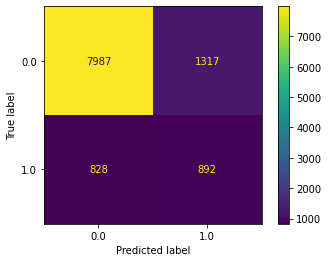

In [105]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_predictions(y_test, rc.predict(X_test))
plt.show()

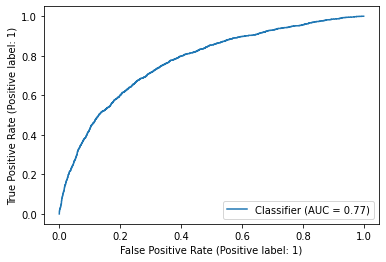

In [106]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, rc.predict_proba(X_test)[:,1])
plt.show()

In [107]:
from sklearn.metrics import f1_score

f1_score(y_test, rc.predict(X_test))

0.4540595571392212

In [108]:
X

,user_id,product_id,u_p_order_rate,u_p_reorder_rate,u_p_avg_position,u_p_orders_since_last,days_since_prior_reorder_rate,user_reorder_rate,user_unique_products,user_total_products,...,mean_position,dept_reorder_rate,aisle_reorder_rate,hour_reorder_rate,day_reorder_rate,p_days_since_prior_order_reorder_rate,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1.0,196,0.153846,1.0,1.000000,0.0,0.50,0.615385,9.0,13.0,...,3.764695,0.652324,0.638641,0.083333,0.166667,1.000000,11.0,4.0,8.0,14.0
1,52.0,196,0.133333,1.0,4.500000,0.0,1.00,0.866667,11.0,15.0,...,3.764695,0.652324,0.638641,0.083333,0.166667,1.000000,28.0,4.0,16.0,3.0
2,67.0,196,0.222222,1.0,1.500000,0.0,1.00,0.666667,7.0,9.0,...,3.764695,0.652324,0.638641,0.083333,0.166667,1.000000,25.0,0.0,11.0,5.0
3,82.0,196,0.142857,1.0,1.333333,0.0,1.00,0.809524,14.0,21.0,...,3.764695,0.652324,0.638641,0.083333,0.166667,1.000000,20.0,1.0,10.0,13.0
4,120.0,196,0.333333,0.0,2.000000,0.0,0.50,0.000000,3.0,3.0,...,3.764695,0.652324,0.638641,0.083333,0.166667,1.000000,4.0,2.0,9.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110226,9985.0,28397,0.051724,1.0,7.000000,0.0,0.50,0.741379,43.0,58.0,...,7.650000,0.561137,0.586964,0.222222,0.347826,0.066667,20.0,6.0,13.0,30.0
110227,9986.0,39263,0.142857,0.0,1.000000,0.0,0.50,0.000000,7.0,7.0,...,3.000000,0.576405,0.575678,0.112360,0.090909,0.097561,7.0,5.0,17.0,1.0
110228,10000.0,21167,0.005917,0.0,4.000000,42.0,1.00,0.727811,105.0,169.0,...,10.166667,0.574618,0.597750,0.027778,0.058824,0.035714,73.0,4.0,21.0,6.0
110229,10000.0,38578,0.005917,0.0,5.000000,42.0,0.25,0.727811,105.0,169.0,...,9.571429,0.574618,0.593957,0.121212,0.116858,0.230769,73.0,4.0,21.0,6.0


# Logistic Regression

In [321]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight = 'balanced', C = 20, max_iter = 3000)
# lr = LogisticRegression(C = 0.01, max_iter = 1000)

In [322]:
lr.fit(X_train, y_train)

LogisticRegression(C=20, class_weight='balanced', max_iter=3000)

In [323]:
lr.score(X_train, y_train)

0.6476256715755945

In [324]:
lr.score(X_test, y_test)

0.6449564586357039

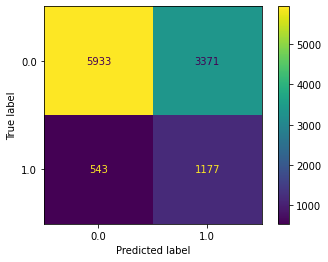

In [325]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, lr.predict(X_test))
plt.show()

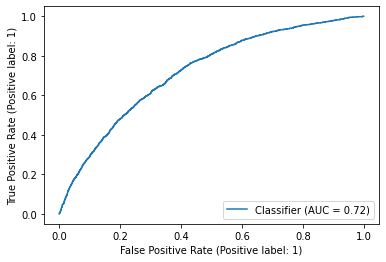

In [326]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, lr.predict_proba(X_test)[:,1])
plt.show()

In [327]:
from sklearn.metrics import f1_score

f1_score(y_test, lr.predict(X_test))

0.37555839183152523

# Decision Tree

In [659]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split = 20, class_weight= 'balanced', max_depth = 10)

In [660]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=20)

In [661]:
dt.score(X_train, y_train)

0.7100809418690214

In [662]:
dt.score(X_test, y_test)

0.6809687953555879

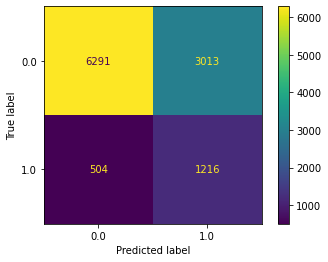

In [663]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_predictions(y_test, dt.predict(X_test))
plt.show()

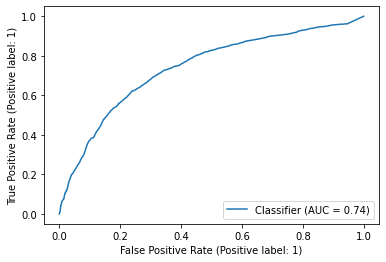

In [664]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, dt.predict_proba(X_test)[:,1])
plt.show()

In [665]:
from sklearn.metrics import f1_score

f1_score(y_test, dt.predict(X_test))

0.4088082030593377

In [666]:
# from sklearn import tree
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# tree.plot_tree(dt,filled = True)

# recommendation

In [202]:
df = X_test.copy()

In [203]:
df["y_pred"] = pd.Series(rc.predict(X_test))
df = df[df["y_pred"] == 1]

In [204]:
df = df.loc[:,["user_id", "product_id"]]
df = df.merge(data_products.loc[:,["product_id", "product_name"]], on = "product_id")
df.drop(["product_id"], axis = 1)
df.sort_values("user_id", inplace = True)
df

,user_id,product_id,product_name
48,1.0,17122,Honeycrisp Apples
100,50.0,23165,Organic Leek
143,99.0,22035,Organic Whole String Cheese
196,110.0,41787,Bartlett Pears
121,214.0,21137,Organic Strawberries
...,...,...,...
83,9707.0,21903,Organic Baby Spinach
22,9730.0,13176,Bag of Organic Bananas
161,9785.0,45007,Organic Zucchini
54,9944.0,16797,Strawberries


In [205]:
new_df = df.groupby(["user_id"])["product_name"].agg(lambda x : frozenset(x)).reset_index(name = "reorded_product_names")
new_df

,user_id,reorded_product_names
0,1.0,(Honeycrisp Apples)
1,50.0,(Organic Leek)
2,99.0,(Organic Whole String Cheese)
3,110.0,(Bartlett Pears)
4,214.0,(Organic Strawberries)
...,...,...
201,9707.0,(Organic Baby Spinach)
202,9730.0,(Bag of Organic Bananas)
203,9785.0,(Organic Zucchini)
204,9944.0,(Strawberries)


In [206]:
new_df["recommendation"] = ''

In [207]:
for i in range(len(new_df["reorded_product_names"])):
  for j in range(len(rules["antecedents"])):
    if new_df["reorded_product_names"][i].issubset(rules["antecedents"][j]):
      new_df.iloc[i,2] = rules.iloc[j,1]

In [223]:
new_df[new_df["recommendation"]!=''].sort_values("user_id").reset_index(drop = True)

,user_id,reorded_product_names,recommendation
0,214.0,(Organic Strawberries),Organic Raspberries
1,245.0,(Organic Strawberries),Organic Raspberries
2,323.0,(Organic Strawberries),Organic Raspberries
3,487.0,(Bag of Organic Bananas),Organic Raspberries
4,567.0,(Organic Avocado),Banana
...,...,...,...
69,9544.0,(Honeycrisp Apple),Banana
70,9667.0,(Honeycrisp Apple),Banana
71,9707.0,(Organic Baby Spinach),Organic Strawberries
72,9730.0,(Bag of Organic Bananas),Organic Raspberries
